In [1]:
import os
import glob
import netCDF4
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature

from matplotlib.collections import LineCollection
from matplotlib.path import Path
import matplotlib.path as mpath
import matplotlib.patches as patches
from matplotlib.image import imread
from matplotlib.colors import ListedColormap, BoundaryNorm

from scipy import stats

In [2]:
AntPen_W = -180; AntPen_W_360 = 360 + AntPen_W;
AntPen_E = 180; AntPen_E_360 = 360 + AntPen_E;
AntPen_S = -90
AntPen_N = -50
n_models = 18

DATA-AWI-CM-1-1-MR-ANN-historical-1950-2014.nc
DATA-BCC-CSM2-MR-ANN-historical-1950-2014.nc
DATA-CAMS-CSM1-0-ANN-historical-1950-2014.nc
DATA-CAS-ESM2-0-ANN-historical-1950-2014.nc
DATA-CESM2-WACCM-ANN-historical-1950-2014.nc
DATA-CIESM-ANN-historical-1950-2014.nc
DATA-CMCC-CM2-SR5-ANN-historical-1950-2014.nc
DATA-CMCC-ESM2-ANN-historical-1950-2014.nc
DATA-EC-Earth3-ANN-historical-1950-2014.nc
DATA-EC-Earth3-Veg-ANN-historical-1950-2014.nc
DATA-FGOALS-f3-L-ANN-historical-1950-2014.nc
DATA-GFDL-ESM4-ANN-historical-1950-2014.nc
DATA-INM-CM4-8-ANN-historical-1950-2014.nc
DATA-INM-CM5-0-ANN-historical-1950-2014.nc
DATA-MPI-ESM1-2-HR-ANN-historical-1950-2014.nc
DATA-MRI-ESM2-0-ANN-historical-1950-2014.nc
DATA-NorESM2-MM-ANN-historical-1950-2014.nc
DATA-TaiESM1-ANN-historical-1950-2014.nc
DATA-AWI-CM-1-1-MR-ANN-ssp585-2015-2099.nc
DATA-BCC-CSM2-MR-ANN-ssp585-2015-2099.nc
DATA-CAMS-CSM1-0-ANN-ssp585-2015-2099.nc
DATA-CAS-ESM2-0-ANN-ssp585-2015-2099.nc
DATA-CESM2-WACCM-ANN-ssp585-2015-2099.nc


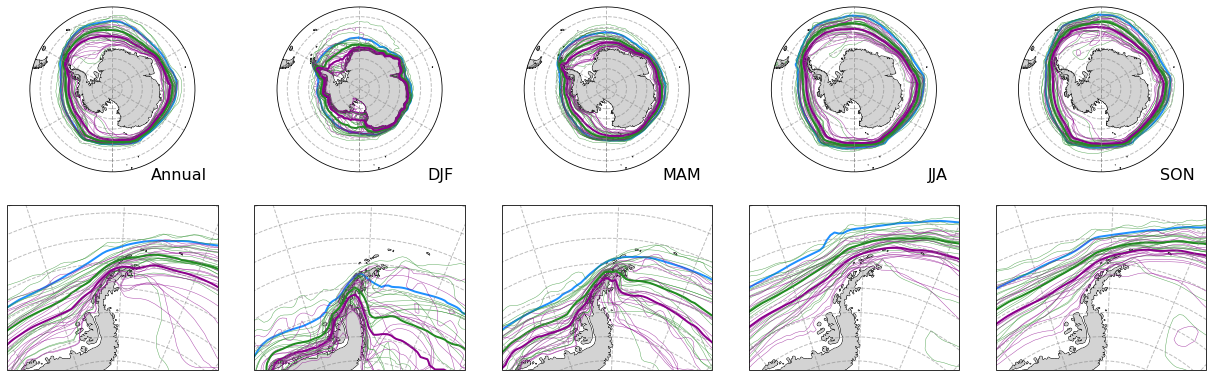

In [3]:
#################
# Plot map Antarctic Peninsula t20 iso0
#################

###PLOT MAP###
#Map parameters
fig = plt.figure(figsize=[20,6])

projection1 = ccrs.SouthPolarStereo(central_longitude=0)
projection2 = ccrs.SouthPolarStereo(central_longitude=-62.5, true_scale_latitude=None)

ax1 = plt.subplot(2,5,1,projection=projection1)
ax2 = plt.subplot(2,5,2,projection=projection1)
ax3 = plt.subplot(2,5,3,projection=projection1)
ax4 = plt.subplot(2,5,4,projection=projection1)
ax5 = plt.subplot(2,5,5,projection=projection1)
ax6 = plt.subplot(2,5,6,projection=projection2)
ax7 = plt.subplot(2,5,7,projection=projection2)
ax8 = plt.subplot(2,5,8,projection=projection2)
ax9 = plt.subplot(2,5,9,projection=projection2)
ax10 = plt.subplot(2,5,10,projection=projection2)

#Set circle boundary
theta=np.linspace(0, 2*np.pi, 100)
center, radius = [0.5,0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts*radius + center)
ax1.set_boundary(circle, transform=ax1.transAxes)
ax2.set_boundary(circle, transform=ax2.transAxes)
ax3.set_boundary(circle, transform=ax3.transAxes)
ax4.set_boundary(circle, transform=ax4.transAxes)
ax5.set_boundary(circle, transform=ax5.transAxes)

#ax.set_extent([AntPen_W, AntPen_E, AntPen_S, AntPen_N], crs=ccrs.PlateCarree(), clip=True)
ax1.set_extent([-180, 180, -90, -50], crs=ccrs.PlateCarree())
ax2.set_extent([-180, 180, -90, -50], crs=ccrs.PlateCarree())
ax3.set_extent([-180, 180, -90, -50], crs=ccrs.PlateCarree())
ax4.set_extent([-180, 180, -90, -50], crs=ccrs.PlateCarree())
ax5.set_extent([-180, 180, -90, -50], crs=ccrs.PlateCarree())
ax6.set_extent([-85, -40, -75, -56], crs=ccrs.PlateCarree())
ax7.set_extent([-85, -40, -75, -56], crs=ccrs.PlateCarree())
ax8.set_extent([-85, -40, -75, -56], crs=ccrs.PlateCarree())
ax9.set_extent([-85, -40, -75, -56], crs=ccrs.PlateCarree())
ax10.set_extent([-85, -40, -75, -56], crs=ccrs.PlateCarree())

#Background
land_50m = cartopy.feature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='none',
                                        facecolor='LightGray')

ax1.gridlines(linewidth=1, color='gray', alpha=0.5, linestyle='--')
ax1.coastlines(resolution='50m', facecolor='gray')
ax1.add_feature(land_50m)
ax2.gridlines(linewidth=1, color='gray', alpha=0.5, linestyle='--')
ax2.coastlines(resolution='50m', facecolor='gray')
ax2.add_feature(land_50m)
ax3.gridlines(linewidth=1, color='gray', alpha=0.5, linestyle='--')
ax3.coastlines(resolution='50m', facecolor='gray')
ax3.add_feature(land_50m)
ax4.gridlines(linewidth=1, color='gray', alpha=0.5, linestyle='--')
ax4.coastlines(resolution='50m', facecolor='gray')
ax4.add_feature(land_50m)
ax5.gridlines(linewidth=1, color='gray', alpha=0.5, linestyle='--')
ax5.coastlines(resolution='50m', facecolor='gray')
ax5.add_feature(land_50m)
ax6.gridlines(linewidth=1, color='gray', alpha=0.5, linestyle='--')
ax6.coastlines(resolution='50m', facecolor='gray')
ax6.add_feature(land_50m)
ax7.gridlines(linewidth=1, color='gray', alpha=0.5, linestyle='--')
ax7.coastlines(resolution='50m', facecolor='gray')
ax7.add_feature(land_50m)
ax8.gridlines(linewidth=1, color='gray', alpha=0.5, linestyle='--')
ax8.coastlines(resolution='50m', facecolor='gray')
ax8.add_feature(land_50m)
ax9.gridlines(linewidth=1, color='gray', alpha=0.5, linestyle='--')
ax9.coastlines(resolution='50m', facecolor='gray')
ax9.add_feature(land_50m)
ax10.gridlines(linewidth=1, color='gray', alpha=0.5, linestyle='--')
ax10.coastlines(resolution='50m', facecolor='gray')
ax10.add_feature(land_50m)

######################################################################
###Plot data from historical CMEIP6 models
lon_interpol = np.arange(0,360)
lat0_models_ANN = np.empty([n_models,np.size(lon_interpol)])
lat0_models_DJF = np.empty([n_models,np.size(lon_interpol)])
lat0_models_MAM = np.empty([n_models,np.size(lon_interpol)])
lat0_models_JJA = np.empty([n_models,np.size(lon_interpol)])
lat0_models_SON = np.empty([n_models,np.size(lon_interpol)])

os.chdir(r'D:\Bigfiles\CEMIP6_ZIL\Historical')

#ANN
filenames = 'DATA*ANN-historical-1950-2014.nc'
for j,filename in enumerate(glob.glob(filenames)):
    print(filename)
    ncdf = netCDF4.Dataset(filename)
    lons = ncdf.variables['lons'][:]
    lats = ncdf.variables['lats'][:]
    years = ncdf.variables['years'][:]
    ix_W = np.where(lons >= AntPen_W_360)[0][0]
    ix_E = np.where(lons <= AntPen_E_360)[0][-1]
    ix_N = np.where(lats <= AntPen_N)[0][-1]
    ix_S = np.where(lats >= AntPen_S)[0][0]
    T = ncdf.variables['tas']
    T_area = ncdf.variables['tas'][:, ix_S:ix_N, :]
    
    #Mask South America
    mask_SA = np.zeros(np.shape(T_area[:,:,:]))
    mask_SA_ix_W = np.where(lons >= -76+360)[0][0]
    mask_SA_ix_E = np.where(lons <= -65+360)[0][-1]
    mask_SA_ix_N = np.where(lats <= AntPen_N)[0][-1]
    mask_SA_ix_S = np.where(lats >= -56)[0][0]
    mask_SA[:,mask_SA_ix_S:mask_SA_ix_N,mask_SA_ix_W:mask_SA_ix_E] = 1
    T_area = np.ma.array(T_area[:,:,:], mask=mask_SA)

    #Plot isotherm-0
    #CS = ax1.contour(lons, lats, np.mean(T, axis=0), [0], colors='DodgerBlue', linewidths=0.5, transform=ccrs.PlateCarree(), alpha=0.7)
    #CS = ax6.contour(lons, lats, np.mean(T, axis=0), [0], colors='DodgerBlue', linewidths=0.5, transform=ccrs.PlateCarree(), alpha=0.7)
    
    lat0 = np.empty([np.size(lons)])
    for i,lon in enumerate(lons):
        lat0[i] = np.interp(0, np.mean(T_area, axis=0)[:,i], lats[ix_S:ix_N])
    lat0_interpol = np.interp(lon_interpol, lons, lat0)
    lat0_models_ANN[j,:] = lat0_interpol

#DJF
filenames = 'DATA*DJF-historical-1950-2014.nc'
for j,filename in enumerate(glob.glob(filenames)):
    ncdf = netCDF4.Dataset(filename)
    lons = ncdf.variables['lons'][:]
    lats = ncdf.variables['lats'][:]
    years = ncdf.variables['years'][:]
    ix_W = np.where(lons >= AntPen_W_360)[0][0]
    ix_E = np.where(lons <= AntPen_E_360)[0][-1]
    ix_N = np.where(lats <= AntPen_N)[0][-1]
    ix_S = np.where(lats >= AntPen_S)[0][0]
    T = ncdf.variables['tas']
    T_area = ncdf.variables['tas'][:, ix_S:ix_N, :]
    
    #Mask South America
    mask_SA = np.zeros(np.shape(T_area[:,:,:]))
    mask_SA_ix_W = np.where(lons >= -76+360)[0][0]
    mask_SA_ix_E = np.where(lons <= -65+360)[0][-1]
    mask_SA_ix_N = np.where(lats <= AntPen_N)[0][-1]
    mask_SA_ix_S = np.where(lats >= -54)[0][0]
    mask_SA[:,mask_SA_ix_S:mask_SA_ix_N,mask_SA_ix_W:mask_SA_ix_E] = 1
    T_area = np.ma.array(T_area[:,:,:], mask=mask_SA)

    #Plot isotherm-0
    #CS = ax2.contour(lons, lats, np.mean(T, axis=0), [0], colors='DodgerBlue', linewidths=0.5, transform=ccrs.PlateCarree(), alpha=0.7)
    #CS = ax7.contour(lons, lats, np.mean(T, axis=0), [0], colors='DodgerBlue', linewidths=0.5, transform=ccrs.PlateCarree(), alpha=0.7)
    
    lat0 = np.empty([np.size(lons)])
    for i,lon in enumerate(lons):
        lat0[i] = np.interp(0, np.mean(T_area, axis=0)[:,i], lats[ix_S:ix_N])
    lat0_interpol = np.interp(lon_interpol, lons, lat0)
    lat0_models_DJF[j,:] = lat0_interpol

#MAM
filenames = 'DATA*MAM-historical-1950-2014.nc'
for j,filename in enumerate(glob.glob(filenames)):
    ncdf = netCDF4.Dataset(filename)
    lons = ncdf.variables['lons'][:]
    lats = ncdf.variables['lats'][:]
    years = ncdf.variables['years'][:]
    ix_W = np.where(lons >= AntPen_W_360)[0][0]
    ix_E = np.where(lons <= AntPen_E_360)[0][-1]
    ix_N = np.where(lats <= AntPen_N)[0][-1]
    ix_S = np.where(lats >= AntPen_S)[0][0]
    T = ncdf.variables['tas']
    T_area = ncdf.variables['tas'][:, ix_S:ix_N, :]
    
    #Mask South America
    mask_SA = np.zeros(np.shape(T_area[:,:,:]))
    mask_SA_ix_W = np.where(lons >= -76+360)[0][0]
    mask_SA_ix_E = np.where(lons <= -65+360)[0][-1]
    mask_SA_ix_N = np.where(lats <= AntPen_N)[0][-1]
    mask_SA_ix_S = np.where(lats >= -54)[0][0]
    mask_SA[:,mask_SA_ix_S:mask_SA_ix_N,mask_SA_ix_W:mask_SA_ix_E] = 1
    T_area = np.ma.array(T_area[:,:,:], mask=mask_SA)
    
    #Plot isotherm-0
    #CS = ax3.contour(lons, lats, np.mean(T, axis=0), [0], colors='DodgerBlue', linewidths=0.5, transform=ccrs.PlateCarree(), alpha=0.7)
    #CS = ax8.contour(lons, lats, np.mean(T, axis=0), [0], colors='DodgerBlue', linewidths=0.5, transform=ccrs.PlateCarree(), alpha=0.7)
    
    lat0 = np.empty([np.size(lons)])
    for i,lon in enumerate(lons):
        lat0[i] = np.interp(0, np.mean(T_area, axis=0)[:,i], lats[ix_S:ix_N])
    lat0_interpol = np.interp(lon_interpol, lons, lat0)
    lat0_models_MAM[j,:] = lat0_interpol

#JJA
filenames = 'DATA*JJA-historical-1950-2014.nc'
for j,filename in enumerate(glob.glob(filenames)):
    ncdf = netCDF4.Dataset(filename)
    lons = ncdf.variables['lons'][:]
    lats = ncdf.variables['lats'][:]
    years = ncdf.variables['years'][:]
    ix_W = np.where(lons >= AntPen_W_360)[0][0]
    ix_E = np.where(lons <= AntPen_E_360)[0][-1]
    ix_N = np.where(lats <= AntPen_N)[0][-1]
    ix_S = np.where(lats >= AntPen_S)[0][0]
    T = ncdf.variables['tas']
    T_area = ncdf.variables['tas'][:, ix_S:ix_N, :]

    #Mask South America
    mask_SA = np.zeros(np.shape(T_area[:,:,:]))
    mask_SA_ix_W = np.where(lons >= -76+360)[0][0]
    mask_SA_ix_E = np.where(lons <= -65+360)[0][-1]
    mask_SA_ix_N = np.where(lats <= AntPen_N)[0][-1]
    mask_SA_ix_S = np.where(lats >= -54)[0][0]
    mask_SA[:,mask_SA_ix_S:mask_SA_ix_N,mask_SA_ix_W:mask_SA_ix_E] = 1
    T_area = np.ma.array(T_area[:,:,:], mask=mask_SA)
    
    #Plot isotherm-0
    #CS = ax4.contour(lons, lats, np.mean(T, axis=0), [0], colors='DodgerBlue', linewidths=0.5, transform=ccrs.PlateCarree(), alpha=0.7)
    #CS = ax9.contour(lons, lats, np.mean(T, axis=0), [0], colors='DodgerBlue', linewidths=0.5, transform=ccrs.PlateCarree(), alpha=0.7)
    
    lat0 = np.empty([np.size(lons)])
    for i,lon in enumerate(lons):
        lat0[i] = np.interp(0, np.mean(T_area, axis=0)[:,i], lats[ix_S:ix_N])
    lat0_interpol = np.interp(lon_interpol, lons, lat0)
    lat0_models_JJA[j,:] = lat0_interpol

#SON

filenames = 'DATA*SON-historical-1950-2014.nc'
for j,filename in enumerate(glob.glob(filenames)):
    ncdf = netCDF4.Dataset(filename)
    lons = ncdf.variables['lons'][:]
    lats = ncdf.variables['lats'][:]
    years = ncdf.variables['years'][:]
    ix_W = np.where(lons >= AntPen_W_360)[0][0]
    ix_E = np.where(lons <= AntPen_E_360)[0][-1]
    ix_N = np.where(lats <= AntPen_N)[0][-1]
    ix_S = np.where(lats >= AntPen_S)[0][0]
    T = ncdf.variables['tas']
    T_area = ncdf.variables['tas'][:, ix_S:ix_N, :]

    #Mask South America
    mask_SA = np.zeros(np.shape(T_area[:,:,:]))
    mask_SA_ix_W = np.where(lons >= -76+360)[0][0]
    mask_SA_ix_E = np.where(lons <= -65+360)[0][-1]
    mask_SA_ix_N = np.where(lats <= AntPen_N)[0][-1]
    mask_SA_ix_S = np.where(lats >= -54)[0][0]
    mask_SA[:,mask_SA_ix_S:mask_SA_ix_N,mask_SA_ix_W:mask_SA_ix_E] = 1
    T_area = np.ma.array(T_area[:,:,:], mask=mask_SA)

    #Plot isotherm-0
    #CS = ax5.contour(lons, lats, np.mean(T, axis=0), [0], colors='DodgerBlue', linewidths=0.5, transform=ccrs.PlateCarree(), alpha=0.7)
    #CS = ax10.contour(lons, lats, np.mean(T, axis=0), [0], colors='DodgerBlue', linewidths=0.5, transform=ccrs.PlateCarree(), alpha=0.7)
    
    lat0 = np.empty([np.size(lons)])
    for i,lon in enumerate(lons):
        lat0[i] = np.interp(0, np.mean(T_area, axis=0)[:,i], lats[ix_S:ix_N])
    lat0_interpol = np.interp(lon_interpol, lons, lat0)
    lat0_models_SON[j,:] = lat0_interpol


#Model mean
ax1.plot(lon_interpol, np.mean(lat0_models_ANN, axis=0), 'DodgerBlue', linewidth=2, transform=ccrs.PlateCarree())
ax2.plot(lon_interpol, np.mean(lat0_models_DJF, axis=0), 'DodgerBlue', linewidth=2, transform=ccrs.PlateCarree())
ax3.plot(lon_interpol, np.mean(lat0_models_MAM, axis=0), 'DodgerBlue', linewidth=2, transform=ccrs.PlateCarree())
ax4.plot(lon_interpol, np.mean(lat0_models_JJA, axis=0), 'DodgerBlue', linewidth=2, transform=ccrs.PlateCarree())
ax5.plot(lon_interpol, np.mean(lat0_models_SON, axis=0), 'DodgerBlue', linewidth=2, transform=ccrs.PlateCarree())

ax6.plot(lon_interpol, np.mean(lat0_models_ANN, axis=0), 'DodgerBlue', linewidth=2, transform=ccrs.PlateCarree())
ax7.plot(lon_interpol, np.mean(lat0_models_DJF, axis=0), 'DodgerBlue', linewidth=2, transform=ccrs.PlateCarree())
ax8.plot(lon_interpol, np.mean(lat0_models_MAM, axis=0), 'DodgerBlue', linewidth=2, transform=ccrs.PlateCarree())
ax9.plot(lon_interpol, np.mean(lat0_models_JJA, axis=0), 'DodgerBlue', linewidth=2, transform=ccrs.PlateCarree())
ax10.plot(lon_interpol, np.mean(lat0_models_SON, axis=0), 'DodgerBlue', linewidth=2, transform=ccrs.PlateCarree())

######################################################################
###Plot data from SSP CMEIP6 models
lon_interpol = np.arange(0,360)
lat0_models_ANN = np.empty([n_models,np.size(lon_interpol)])
lon_interpol_40_69 = np.arange(0,360)
lon_interpol_70_99 = np.arange(0,360)

lat0_models_ANN_40_69 = np.empty([n_models,np.size(lon_interpol)])
lat0_models_DJF_40_69 = np.empty([n_models,np.size(lon_interpol)])
lat0_models_MAM_40_69 = np.empty([n_models,np.size(lon_interpol)])
lat0_models_JJA_40_69 = np.empty([n_models,np.size(lon_interpol)])
lat0_models_SON_40_69 = np.empty([n_models,np.size(lon_interpol)])

lat0_models_ANN_70_99 = np.empty([n_models,np.size(lon_interpol)])
lat0_models_DJF_70_99 = np.empty([n_models,np.size(lon_interpol)])
lat0_models_MAM_70_99 = np.empty([n_models,np.size(lon_interpol)])
lat0_models_JJA_70_99 = np.empty([n_models,np.size(lon_interpol)])
lat0_models_SON_70_99 = np.empty([n_models,np.size(lon_interpol)])

lat0_models_ANN_years = np.empty([n_models,np.size(lon_interpol)])
lat0_models_DJF_years = np.empty([n_models,np.size(lon_interpol)])
lat0_models_MAM_years = np.empty([n_models,np.size(lon_interpol)])
lat0_models_JJA_years = np.empty([n_models,np.size(lon_interpol)])
lat0_models_SON_years = np.empty([n_models,np.size(lon_interpol)])

os.chdir(r'D:\Bigfiles\CEMIP6_ZIL\SSP585')

#ANN
filenames = 'DATA*ANN-ssp585-2015-2099.nc'
for j,filename in enumerate(glob.glob(filenames)):
    print(filename)
    ncdf = netCDF4.Dataset(filename)
    lons = ncdf.variables['lons'][:]
    lats = ncdf.variables['lats'][:]
    years = ncdf.variables['years'][:]
    ix_W = np.where(lons >= AntPen_W_360)[0][0]
    ix_E = np.where(lons <= AntPen_E_360)[0][-1]
    ix_N = np.where(lats <= AntPen_N)[0][-1]
    ix_S = np.where(lats >= AntPen_S)[0][0]
    T = ncdf.variables['tas']
    T_area = ncdf.variables['tas'][:, ix_S:ix_N, :]
    
    #Mask South America
    mask_SA = np.zeros(np.shape(T_area[:,:,:]))
    mask_SA_ix_W = np.where(lons >= -76+360)[0][0]
    mask_SA_ix_E = np.where(lons <= -65+360)[0][-1]
    mask_SA_ix_N = np.where(lats <= AntPen_N)[0][-1]
    mask_SA_ix_S = np.where(lats >= -56)[0][0]
    mask_SA[:,mask_SA_ix_S:mask_SA_ix_N,mask_SA_ix_W:mask_SA_ix_E] = 1
    T_area = np.ma.array(T_area[:,:,:], mask=mask_SA)

    #Plot isotherm-0
    CS = ax1.contour(lons, lats, np.mean(T[25:55,:,:], axis=0), [0], colors='ForestGreen', linewidths=0.5, transform=ccrs.PlateCarree(), alpha=0.7)
    CS = ax6.contour(lons, lats, np.mean(T[25:55,:,:], axis=0), [0], colors='ForestGreen', linewidths=0.5, transform=ccrs.PlateCarree(), alpha=0.7)  
    CS = ax1.contour(lons, lats, np.mean(T[55:85,:,:], axis=0), [0], colors='DarkMagenta', linewidths=0.5, transform=ccrs.PlateCarree(), alpha=0.7)
    CS = ax6.contour(lons, lats, np.mean(T[55:85,:,:], axis=0), [0], colors='DarkMagenta', linewidths=0.5, transform=ccrs.PlateCarree(), alpha=0.7)
    
    lat0 = np.empty([np.size(lons)])
    lat0_40_69 = np.empty([np.size(lons)])
    lat0_70_99 = np.empty([np.size(lons)])
    for i,lon in enumerate(lons):
        lat0[i] = np.interp(0, np.mean(T_area[:,:,:], axis=0)[:,i], lats[ix_S:ix_N])
        lat0_40_69[i] = np.interp(0, np.mean(T_area[25:55,:,:], axis=0)[:,i], lats[ix_S:ix_N])
        lat0_70_99[i] = np.interp(0, np.mean(T_area[55:85,:,:], axis=0)[:,i], lats[ix_S:ix_N])
        
    lat0_interpol = np.interp(lon_interpol, lons, lat0)
    lat0_interpol_40_69 = np.interp(lon_interpol, lons, lat0_40_69)
    lat0_interpol_70_99 = np.interp(lon_interpol, lons, lat0_70_99)
    lat0_models_ANN_years[j,:] = lat0_interpol
    lat0_models_ANN_40_69[j,:] = lat0_interpol_40_69
    lat0_models_ANN_70_99[j,:] = lat0_interpol_70_99


#DJF
filenames = 'DATA*DJF-ssp585-2015-2099.nc'
for j,filename in enumerate(glob.glob(filenames)):
    ncdf = netCDF4.Dataset(filename)
    lons = ncdf.variables['lons'][:]
    lats = ncdf.variables['lats'][:]
    years = ncdf.variables['years'][:]
    ix_W = np.where(lons >= AntPen_W_360)[0][0]
    ix_E = np.where(lons <= AntPen_E_360)[0][-1]
    ix_N = np.where(lats <= AntPen_N)[0][-1]
    ix_S = np.where(lats >= AntPen_S)[0][0]
    T = ncdf.variables['tas']
    T_area = ncdf.variables['tas'][:, ix_S:ix_N, :]
    
    #Mask South America
    mask_SA = np.zeros(np.shape(T_area[:,:,:]))
    mask_SA_ix_W = np.where(lons >= -76+360)[0][0]
    mask_SA_ix_E = np.where(lons <= -65+360)[0][-1]
    mask_SA_ix_N = np.where(lats <= AntPen_N)[0][-1]
    mask_SA_ix_S = np.where(lats >= -54)[0][0]
    mask_SA[:,mask_SA_ix_S:mask_SA_ix_N,mask_SA_ix_W:mask_SA_ix_E] = 1
    T_area = np.ma.array(T_area[:,:,:], mask=mask_SA)

    #Plot isotherm-0
    CS = ax2.contour(lons, lats, np.mean(T[25:55,:,:], axis=0), [0], colors='ForestGreen', linewidths=0.5, transform=ccrs.PlateCarree(), alpha=0.7)
    CS = ax7.contour(lons, lats, np.mean(T[25:55,:,:], axis=0), [0], colors='ForestGreen', linewidths=0.5, transform=ccrs.PlateCarree(), alpha=0.7)  
    CS = ax2.contour(lons, lats, np.mean(T[55:85,:,:], axis=0), [0], colors='DarkMagenta', linewidths=0.5, transform=ccrs.PlateCarree(), alpha=0.7)
    CS = ax7.contour(lons, lats, np.mean(T[55:85,:,:], axis=0), [0], colors='DarkMagenta', linewidths=0.5, transform=ccrs.PlateCarree(), alpha=0.7)
    
    lat0 = np.empty([np.size(lons)])
    lat0_40_69 = np.empty([np.size(lons)])
    lat0_70_99 = np.empty([np.size(lons)])
    for i,lon in enumerate(lons):
        lat0[i] = np.interp(0, np.mean(T_area[:,:,:], axis=0)[:,i], lats[ix_S:ix_N])
        lat0_40_69[i] = np.interp(0, np.mean(T_area[25:55,:,:], axis=0)[:,i], lats[ix_S:ix_N])
        lat0_70_99[i] = np.interp(0, np.mean(T_area[55:85,:,:], axis=0)[:,i], lats[ix_S:ix_N])
        
    lat0_interpol = np.interp(lon_interpol, lons, lat0)
    lat0_interpol_40_69 = np.interp(lon_interpol, lons, lat0_40_69)
    lat0_interpol_70_99 = np.interp(lon_interpol, lons, lat0_70_99)
    lat0_models_DJF_years[j,:] = lat0_interpol
    lat0_models_DJF_40_69[j,:] = lat0_interpol_40_69
    lat0_models_DJF_70_99[j,:] = lat0_interpol_70_99

#MAM
filenames = 'DATA*MAM-ssp585-2015-2099.nc'
for j,filename in enumerate(glob.glob(filenames)):
    ncdf = netCDF4.Dataset(filename)
    lons = ncdf.variables['lons'][:]
    lats = ncdf.variables['lats'][:]
    years = ncdf.variables['years'][:]
    ix_W = np.where(lons >= AntPen_W_360)[0][0]
    ix_E = np.where(lons <= AntPen_E_360)[0][-1]
    ix_N = np.where(lats <= AntPen_N)[0][-1]
    ix_S = np.where(lats >= AntPen_S)[0][0]
    T = ncdf.variables['tas']
    T_area = ncdf.variables['tas'][:, ix_S:ix_N, :]
    
    #Mask South America
    mask_SA = np.zeros(np.shape(T_area[:,:,:]))
    mask_SA_ix_W = np.where(lons >= -76+360)[0][0]
    mask_SA_ix_E = np.where(lons <= -65+360)[0][-1]
    mask_SA_ix_N = np.where(lats <= AntPen_N)[0][-1]
    mask_SA_ix_S = np.where(lats >= -54)[0][0]
    mask_SA[:,mask_SA_ix_S:mask_SA_ix_N,mask_SA_ix_W:mask_SA_ix_E] = 1
    T_area = np.ma.array(T_area[:,:,:], mask=mask_SA)
    
    #Plot isotherm-0
    CS = ax3.contour(lons, lats, np.mean(T[25:55,:,:], axis=0), [0], colors='ForestGreen', linewidths=0.5, transform=ccrs.PlateCarree(), alpha=0.7)
    CS = ax8.contour(lons, lats, np.mean(T[25:55,:,:], axis=0), [0], colors='ForestGreen', linewidths=0.5, transform=ccrs.PlateCarree(), alpha=0.7)  
    CS = ax3.contour(lons, lats, np.mean(T[55:85,:,:], axis=0), [0], colors='DarkMagenta', linewidths=0.5, transform=ccrs.PlateCarree(), alpha=0.7)
    CS = ax8.contour(lons, lats, np.mean(T[55:85,:,:], axis=0), [0], colors='DarkMagenta', linewidths=0.5, transform=ccrs.PlateCarree(), alpha=0.7)
    
    lat0 = np.empty([np.size(lons)])
    lat0_40_69 = np.empty([np.size(lons)])
    lat0_70_99 = np.empty([np.size(lons)])
    for i,lon in enumerate(lons):
        lat0[i] = np.interp(0, np.mean(T_area[:,:,:], axis=0)[:,i], lats[ix_S:ix_N])
        lat0_40_69[i] = np.interp(0, np.mean(T_area[25:55,:,:], axis=0)[:,i], lats[ix_S:ix_N])
        lat0_70_99[i] = np.interp(0, np.mean(T_area[55:85,:,:], axis=0)[:,i], lats[ix_S:ix_N])
        
    lat0_interpol = np.interp(lon_interpol, lons, lat0)
    lat0_interpol_40_69 = np.interp(lon_interpol, lons, lat0_40_69)
    lat0_interpol_70_99 = np.interp(lon_interpol, lons, lat0_70_99)
    lat0_models_MAM_years[j,:] = lat0_interpol
    lat0_models_MAM_40_69[j,:] = lat0_interpol_40_69
    lat0_models_MAM_70_99[j,:] = lat0_interpol_70_99

#JJA
filenames = 'DATA*JJA-ssp585-2015-2099.nc'
for j,filename in enumerate(glob.glob(filenames)):
    ncdf = netCDF4.Dataset(filename)
    lons = ncdf.variables['lons'][:]
    lats = ncdf.variables['lats'][:]
    years = ncdf.variables['years'][:]
    ix_W = np.where(lons >= AntPen_W_360)[0][0]
    ix_E = np.where(lons <= AntPen_E_360)[0][-1]
    ix_N = np.where(lats <= AntPen_N)[0][-1]
    ix_S = np.where(lats >= AntPen_S)[0][0]
    T = ncdf.variables['tas']
    T_area = ncdf.variables['tas'][:, ix_S:ix_N, :]

    #Mask South America
    mask_SA = np.zeros(np.shape(T_area[:,:,:]))
    mask_SA_ix_W = np.where(lons >= -76+360)[0][0]
    mask_SA_ix_E = np.where(lons <= -65+360)[0][-1]
    mask_SA_ix_N = np.where(lats <= AntPen_N)[0][-1]
    mask_SA_ix_S = np.where(lats >= -54)[0][0]
    mask_SA[:,mask_SA_ix_S:mask_SA_ix_N,mask_SA_ix_W:mask_SA_ix_E] = 1
    T_area = np.ma.array(T_area[:,:,:], mask=mask_SA)
    
    #Plot isotherm-0
    CS = ax4.contour(lons, lats, np.mean(T[25:55,:,:], axis=0), [0], colors='ForestGreen', linewidths=0.5, transform=ccrs.PlateCarree(), alpha=0.7)
    CS = ax9.contour(lons, lats, np.mean(T[25:55,:,:], axis=0), [0], colors='ForestGreen', linewidths=0.5, transform=ccrs.PlateCarree(), alpha=0.7)  
    CS = ax4.contour(lons, lats, np.mean(T[55:85,:,:], axis=0), [0], colors='DarkMagenta', linewidths=0.5, transform=ccrs.PlateCarree(), alpha=0.7)
    CS = ax9.contour(lons, lats, np.mean(T[55:85,:,:], axis=0), [0], colors='DarkMagenta', linewidths=0.5, transform=ccrs.PlateCarree(), alpha=0.7)
    
    lat0 = np.empty([np.size(lons)])
    lat0_40_69 = np.empty([np.size(lons)])
    lat0_70_99 = np.empty([np.size(lons)])
    for i,lon in enumerate(lons):
        lat0[i] = np.interp(0, np.mean(T_area[:,:,:], axis=0)[:,i], lats[ix_S:ix_N])
        lat0_40_69[i] = np.interp(0, np.mean(T_area[25:55,:,:], axis=0)[:,i], lats[ix_S:ix_N])
        lat0_70_99[i] = np.interp(0, np.mean(T_area[55:85,:,:], axis=0)[:,i], lats[ix_S:ix_N])
        
    lat0_interpol = np.interp(lon_interpol, lons, lat0)
    lat0_interpol_40_69 = np.interp(lon_interpol, lons, lat0_40_69)
    lat0_interpol_70_99 = np.interp(lon_interpol, lons, lat0_70_99)
    lat0_models_JJA_years[j,:] = lat0_interpol
    lat0_models_JJA_40_69[j,:] = lat0_interpol_40_69
    lat0_models_JJA_70_99[j,:] = lat0_interpol_70_99

#SON

filenames = 'DATA*SON-ssp585-2015-2099.nc'
for j,filename in enumerate(glob.glob(filenames)):
    ncdf = netCDF4.Dataset(filename)
    lons = ncdf.variables['lons'][:]
    lats = ncdf.variables['lats'][:]
    years = ncdf.variables['years'][:]
    ix_W = np.where(lons >= AntPen_W_360)[0][0]
    ix_E = np.where(lons <= AntPen_E_360)[0][-1]
    ix_N = np.where(lats <= AntPen_N)[0][-1]
    ix_S = np.where(lats >= AntPen_S)[0][0]
    T = ncdf.variables['tas']
    T_area = ncdf.variables['tas'][:, ix_S:ix_N, :]

    #Mask South America
    mask_SA = np.zeros(np.shape(T_area[:,:,:]))
    mask_SA_ix_W = np.where(lons >= -76+360)[0][0]
    mask_SA_ix_E = np.where(lons <= -65+360)[0][-1]
    mask_SA_ix_N = np.where(lats <= AntPen_N)[0][-1]
    mask_SA_ix_S = np.where(lats >= -54)[0][0]
    mask_SA[:,mask_SA_ix_S:mask_SA_ix_N,mask_SA_ix_W:mask_SA_ix_E] = 1
    T_area = np.ma.array(T_area[:,:,:], mask=mask_SA)

    #Plot isotherm-0
    CS = ax5.contour(lons, lats, np.mean(T[25:55,:,:], axis=0), [0], colors='ForestGreen', linewidths=0.5, transform=ccrs.PlateCarree(), alpha=0.7)
    CS = ax10.contour(lons, lats, np.mean(T[25:55,:,:], axis=0), [0], colors='ForestGreen', linewidths=0.5, transform=ccrs.PlateCarree(), alpha=0.7)  
    CS = ax5.contour(lons, lats, np.mean(T[55:85,:,:], axis=0), [0], colors='DarkMagenta', linewidths=0.5, transform=ccrs.PlateCarree(), alpha=0.7)
    CS = ax10.contour(lons, lats, np.mean(T[55:85,:,:], axis=0), [0], colors='DarkMagenta', linewidths=0.5, transform=ccrs.PlateCarree(), alpha=0.7)
    
    lat0 = np.empty([np.size(lons)])
    lat0_40_69 = np.empty([np.size(lons)])
    lat0_70_99 = np.empty([np.size(lons)])
    for i,lon in enumerate(lons):
        lat0[i] = np.interp(0, np.mean(T_area[:,:,:], axis=0)[:,i], lats[ix_S:ix_N])
        lat0_40_69[i] = np.interp(0, np.mean(T_area[25:55,:,:], axis=0)[:,i], lats[ix_S:ix_N])
        lat0_70_99[i] = np.interp(0, np.mean(T_area[55:85,:,:], axis=0)[:,i], lats[ix_S:ix_N])
        
    lat0_interpol = np.interp(lon_interpol, lons, lat0)
    lat0_interpol_40_69 = np.interp(lon_interpol, lons, lat0_40_69)
    lat0_interpol_70_99 = np.interp(lon_interpol, lons, lat0_70_99)
    lat0_models_SON_years[j,:] = lat0_interpol
    lat0_models_SON_40_69[j,:] = lat0_interpol_40_69
    lat0_models_SON_70_99[j,:] = lat0_interpol_70_99

#Model mean
ax1.plot(lon_interpol, np.mean(lat0_models_ANN_40_69, axis=0), 'ForestGreen', linewidth=2, transform=ccrs.PlateCarree(), label='mean 2040-2069')
ax2.plot(lon_interpol, np.mean(lat0_models_DJF_40_69, axis=0), 'ForestGreen', linewidth=2, transform=ccrs.PlateCarree(), label='mean 2040-2069')
ax3.plot(lon_interpol, np.mean(lat0_models_MAM_40_69, axis=0), 'ForestGreen', linewidth=2, transform=ccrs.PlateCarree(), label='mean 2040-2069')
ax4.plot(lon_interpol, np.mean(lat0_models_JJA_40_69, axis=0), 'ForestGreen', linewidth=2, transform=ccrs.PlateCarree(), label='mean 2040-2069')
ax5.plot(lon_interpol, np.mean(lat0_models_SON_40_69, axis=0), 'ForestGreen', linewidth=2, transform=ccrs.PlateCarree(), label='mean 2040-2069')
ax6.plot(lon_interpol, np.mean(lat0_models_ANN_40_69, axis=0), 'ForestGreen', linewidth=2, transform=ccrs.PlateCarree(), label='mean 2040-2069')
ax7.plot(lon_interpol, np.mean(lat0_models_DJF_40_69, axis=0), 'ForestGreen', linewidth=2, transform=ccrs.PlateCarree(), label='mean 2040-2069')
ax8.plot(lon_interpol, np.mean(lat0_models_MAM_40_69, axis=0), 'ForestGreen', linewidth=2, transform=ccrs.PlateCarree(), label='mean 2040-2069')
ax9.plot(lon_interpol, np.mean(lat0_models_JJA_40_69, axis=0), 'ForestGreen', linewidth=2, transform=ccrs.PlateCarree(), label='mean 2040-2069')
ax10.plot(lon_interpol, np.mean(lat0_models_SON_40_69, axis=0), 'ForestGreen', linewidth=2, transform=ccrs.PlateCarree(), label='mean 2040-2069')

ax1.plot(lon_interpol, np.mean(lat0_models_ANN_70_99, axis=0), 'DarkMagenta', linewidth=2, transform=ccrs.PlateCarree(), label='mean 2040-2069')
ax2.plot(lon_interpol, np.mean(lat0_models_DJF_70_99, axis=0), 'DarkMagenta', linewidth=2, transform=ccrs.PlateCarree(), label='mean 2040-2069')
ax3.plot(lon_interpol, np.mean(lat0_models_MAM_70_99, axis=0), 'DarkMagenta', linewidth=2, transform=ccrs.PlateCarree(), label='mean 2040-2069')
ax4.plot(lon_interpol, np.mean(lat0_models_JJA_70_99, axis=0), 'DarkMagenta', linewidth=2, transform=ccrs.PlateCarree(), label='mean 2040-2069')
ax5.plot(lon_interpol, np.mean(lat0_models_SON_70_99, axis=0), 'DarkMagenta', linewidth=2, transform=ccrs.PlateCarree(), label='mean 2040-2069')
ax6.plot(lon_interpol, np.mean(lat0_models_ANN_70_99, axis=0), 'DarkMagenta', linewidth=2, transform=ccrs.PlateCarree(), label='mean 2040-2069')
ax7.plot(lon_interpol, np.mean(lat0_models_DJF_70_99, axis=0), 'DarkMagenta', linewidth=2, transform=ccrs.PlateCarree(), label='mean 2040-2069')
ax8.plot(lon_interpol, np.mean(lat0_models_MAM_70_99, axis=0), 'DarkMagenta', linewidth=2, transform=ccrs.PlateCarree(), label='mean 2040-2069')
ax9.plot(lon_interpol, np.mean(lat0_models_JJA_70_99, axis=0), 'DarkMagenta', linewidth=2, transform=ccrs.PlateCarree(), label='mean 2040-2069')
ax10.plot(lon_interpol, np.mean(lat0_models_SON_70_99, axis=0), 'DarkMagenta', linewidth=2, transform=ccrs.PlateCarree(), label='mean 2040-2069')

#Season
ax1.annotate('Annual', xy=(1.07, -.05), xycoords='axes fraction', ha='right', fontsize=16, zorder=2)
ax2.annotate('DJF', xy=(1.07, -.05), xycoords='axes fraction', ha='right', fontsize=16, zorder=2)
ax3.annotate('MAM', xy=(1.07, -.05), xycoords='axes fraction', ha='right', fontsize=16, zorder=2)
ax4.annotate('JJA', xy=(1.07, -.05), xycoords='axes fraction', ha='right', fontsize=16, zorder=2)
ax5.annotate('SON', xy=(1.07, -.05), xycoords='axes fraction', ha='right', fontsize=16, zorder=2)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, wspace=0.05)
plt.show()

DATA-AWI-CM-1-1-MR-ANN-ssp585-2015-2099.nc
DATA-BCC-CSM2-MR-ANN-ssp585-2015-2099.nc
DATA-CAMS-CSM1-0-ANN-ssp585-2015-2099.nc
DATA-CAS-ESM2-0-ANN-ssp585-2015-2099.nc
DATA-CESM2-WACCM-ANN-ssp585-2015-2099.nc
DATA-CIESM-ANN-ssp585-2015-2099.nc
DATA-CMCC-CM2-SR5-ANN-ssp585-2015-2099.nc
DATA-CMCC-ESM2-ANN-ssp585-2015-2099.nc
DATA-EC-Earth3-ANN-ssp585-2015-2099.nc
DATA-EC-Earth3-Veg-ANN-ssp585-2015-2099.nc
DATA-FGOALS-f3-L-ANN-ssp585-2015-2099.nc
DATA-GFDL-ESM4-ANN-ssp585-2015-2099.nc
DATA-INM-CM4-8-ANN-ssp585-2015-2099.nc
DATA-INM-CM5-0-ANN-ssp585-2015-2099.nc
DATA-MPI-ESM1-2-HR-ANN-ssp585-2015-2099.nc
DATA-MRI-ESM2-0-ANN-ssp585-2015-2099.nc
DATA-NorESM2-MM-ANN-ssp585-2015-2099.nc
DATA-TaiESM1-ANN-ssp585-2015-2099.nc
DATA-AWI-CM-1-1-MR-DJF-ssp585-2015-2099.nc
DATA-BCC-CSM2-MR-DJF-ssp585-2015-2099.nc
DATA-CAMS-CSM1-0-DJF-ssp585-2015-2099.nc
DATA-CAS-ESM2-0-DJF-ssp585-2015-2099.nc
DATA-CESM2-WACCM-DJF-ssp585-2015-2099.nc
DATA-CIESM-DJF-ssp585-2015-2099.nc
DATA-CMCC-CM2-SR5-DJF-ssp585-2015-209

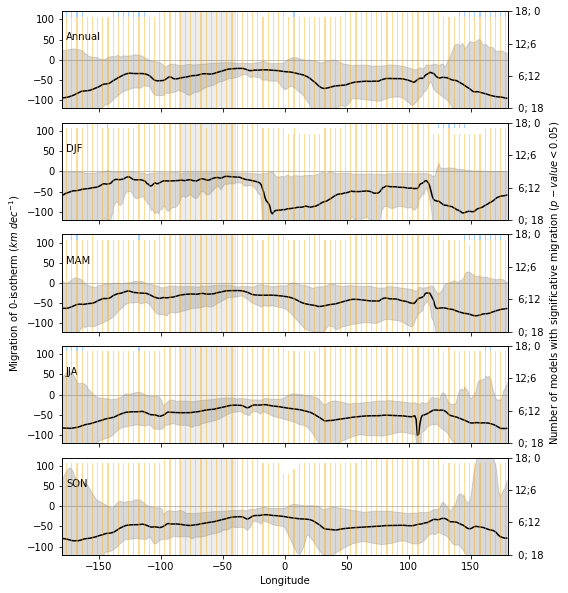

In [4]:
#####################################
# PLOT LON TRENDS HITORICAL
size_years = 84
lon_interpol = np.arange(0,360)
lat0_models_ANN_years = np.empty([n_models,size_years,np.size(lon_interpol)])
lat0_models_DJF_years = np.empty([n_models,size_years,np.size(lon_interpol)])
lat0_models_MAM_years = np.empty([n_models,size_years,np.size(lon_interpol)])
lat0_models_JJA_years = np.empty([n_models,size_years,np.size(lon_interpol)])
lat0_models_SON_years = np.empty([n_models,size_years,np.size(lon_interpol)])

os.chdir(r'D:\Bigfiles\CEMIP6_ZIL\SSP585')

#lon_interpol = np.arange(AntPen_W_360,AntPen_E_360+1)
    
#ANN
filenames = 'DATA*ANN-ssp585-2015-2099.nc'
for j,filename in enumerate(glob.glob(filenames)):
    print(filename)
    ncdf = netCDF4.Dataset(filename)
    lons = ncdf.variables['lons'][:]
    lats = ncdf.variables['lats'][:]
    years = ncdf.variables['years'][:]
    ix_W = np.where(lons >= AntPen_W_360)[0][0]
    ix_E = np.where(lons <= AntPen_E_360)[0][-1]
    ix_N = np.where(lats <= AntPen_N)[0][-1]
    ix_S = np.where(lats >= AntPen_S)[0][0]
    T = ncdf.variables['tas']
    T_area = ncdf.variables['tas'][:, ix_S:ix_N, :]
    
    #Mask South America
    mask_SA = np.zeros(np.shape(T_area[:,:,:]))
    mask_SA_ix_W = np.where(lons >= -76+360)[0][0]
    mask_SA_ix_E = np.where(lons <= -65+360)[0][-1]
    mask_SA_ix_N = np.where(lats <= AntPen_N)[0][-1]
    mask_SA_ix_S = np.where(lats >= -54)[0][0]
    mask_SA[:,mask_SA_ix_S:mask_SA_ix_N,mask_SA_ix_W:mask_SA_ix_E] = 1
    T_area = np.ma.array(T_area[:,:,:], mask=mask_SA)
    
    lat0 = np.empty([np.size(lons)])
    lat0_interpol = np.empty([np.size(years),np.size(lon_interpol)])
    for k,year in enumerate(years):
        for i,lon in enumerate(lons):
            lat0[i] = np.interp(0, T_area[k,:,i], lats[ix_S:ix_N])
        lat0_interpol[k,:] = np.interp(lon_interpol, lons, lat0)
    lat0_models_ANN_years[j,:,:] = lat0_interpol


#DJF
filenames = 'DATA*DJF-ssp585-2015-2099.nc'
for j,filename in enumerate(glob.glob(filenames)):
    print(filename)
    ncdf = netCDF4.Dataset(filename)
    lons = ncdf.variables['lons'][:]
    lats = ncdf.variables['lats'][:]
    years = ncdf.variables['years'][:]
    ix_W = np.where(lons >= AntPen_W_360)[0][0]
    ix_E = np.where(lons <= AntPen_E_360)[0][-1]
    ix_N = np.where(lats <= AntPen_N)[0][-1]
    ix_S = np.where(lats >= AntPen_S)[0][0]
    T = ncdf.variables['tas']
    T_area = ncdf.variables['tas'][:, ix_S:ix_N, :]
    
    #Mask South America
    mask_SA = np.zeros(np.shape(T_area[:,:,:]))
    mask_SA_ix_W = np.where(lons >= -76+360)[0][0]
    mask_SA_ix_E = np.where(lons <= -65+360)[0][-1]
    mask_SA_ix_N = np.where(lats <= AntPen_N)[0][-1]
    mask_SA_ix_S = np.where(lats >= -54)[0][0]
    mask_SA[:,mask_SA_ix_S:mask_SA_ix_N,mask_SA_ix_W:mask_SA_ix_E] = 1
    T_area = np.ma.array(T_area[:,:,:], mask=mask_SA)
    
    lat0 = np.empty([np.size(lons)])
    lat0_interpol = np.empty([np.size(years),np.size(lon_interpol)])
    for k,year in enumerate(years):
        for i,lon in enumerate(lons):
            lat0[i] = np.interp(0, T_area[k,:,i], lats[ix_S:ix_N])
        lat0_interpol[k,:] = np.interp(lon_interpol, lons, lat0)
    lat0_models_DJF_years[j,:,:] = lat0_interpol
    
#MAM
filenames = 'DATA*MAM-ssp585-2015-2099.nc'
for j,filename in enumerate(glob.glob(filenames)):
    print(filename)
    ncdf = netCDF4.Dataset(filename)
    lons = ncdf.variables['lons'][:]
    lats = ncdf.variables['lats'][:]
    years = ncdf.variables['years'][:]
    ix_W = np.where(lons >= AntPen_W_360)[0][0]
    ix_E = np.where(lons <= AntPen_E_360)[0][-1]
    ix_N = np.where(lats <= AntPen_N)[0][-1]
    ix_S = np.where(lats >= AntPen_S)[0][0]
    T = ncdf.variables['tas']
    T_area = ncdf.variables['tas'][:, ix_S:ix_N, :]
    
    #Mask South America
    mask_SA = np.zeros(np.shape(T_area[:,:,:]))
    mask_SA_ix_W = np.where(lons >= -76+360)[0][0]
    mask_SA_ix_E = np.where(lons <= -65+360)[0][-1]
    mask_SA_ix_N = np.where(lats <= AntPen_N)[0][-1]
    mask_SA_ix_S = np.where(lats >= -54)[0][0]
    mask_SA[:,mask_SA_ix_S:mask_SA_ix_N,mask_SA_ix_W:mask_SA_ix_E] = 1
    T_area = np.ma.array(T_area[:,:,:], mask=mask_SA)
    
    lat0 = np.empty([np.size(lons)])
    lat0_interpol = np.empty([np.size(years),np.size(lon_interpol)])
    for k,year in enumerate(years):
        for i,lon in enumerate(lons):
            lat0[i] = np.interp(0, T_area[k,:,i], lats[ix_S:ix_N])
        lat0_interpol[k,:] = np.interp(lon_interpol, lons, lat0)
    lat0_models_MAM_years[j,:,:] = lat0_interpol
    
#JJA
filenames = 'DATA*JJA-ssp585-2015-2099.nc'
for j,filename in enumerate(glob.glob(filenames)):
    print(filename)
    ncdf = netCDF4.Dataset(filename)
    lons = ncdf.variables['lons'][:]
    lats = ncdf.variables['lats'][:]
    years = ncdf.variables['years'][:]
    ix_W = np.where(lons >= AntPen_W_360)[0][0]
    ix_E = np.where(lons <= AntPen_E_360)[0][-1]
    ix_N = np.where(lats <= AntPen_N)[0][-1]
    ix_S = np.where(lats >= AntPen_S)[0][0]
    T = ncdf.variables['tas']
    T_area = ncdf.variables['tas'][:, ix_S:ix_N, :]
    
    #Mask South America
    mask_SA = np.zeros(np.shape(T_area[:,:,:]))
    mask_SA_ix_W = np.where(lons >= -76+360)[0][0]
    mask_SA_ix_E = np.where(lons <= -65+360)[0][-1]
    mask_SA_ix_N = np.where(lats <= AntPen_N)[0][-1]
    mask_SA_ix_S = np.where(lats >= -54)[0][0]
    mask_SA[:,mask_SA_ix_S:mask_SA_ix_N,mask_SA_ix_W:mask_SA_ix_E] = 1
    T_area = np.ma.array(T_area[:,:,:], mask=mask_SA)
    
    lat0 = np.empty([np.size(lons)])
    lat0_interpol = np.empty([np.size(years),np.size(lon_interpol)])
    for k,year in enumerate(years):
        for i,lon in enumerate(lons):
            lat0[i] = np.interp(0, T_area[k,:,i], lats[ix_S:ix_N])
        lat0_interpol[k,:] = np.interp(lon_interpol, lons, lat0)
    lat0_models_JJA_years[j,:,:] = lat0_interpol
    
#SON
filenames = 'DATA*SON-ssp585-2015-2099.nc'
for j,filename in enumerate(glob.glob(filenames)):
    print(filename)
    ncdf = netCDF4.Dataset(filename)
    lons = ncdf.variables['lons'][:]
    lats = ncdf.variables['lats'][:]
    years = ncdf.variables['years'][:]
    ix_W = np.where(lons >= AntPen_W_360)[0][0]
    ix_E = np.where(lons <= AntPen_E_360)[0][-1]
    ix_N = np.where(lats <= AntPen_N)[0][-1]
    ix_S = np.where(lats >= AntPen_S)[0][0]
    T = ncdf.variables['tas']
    T_area = ncdf.variables['tas'][:, ix_S:ix_N, :]
    
    #Mask South America
    mask_SA = np.zeros(np.shape(T_area[:,:,:]))
    mask_SA_ix_W = np.where(lons >= -76+360)[0][0]
    mask_SA_ix_E = np.where(lons <= -65+360)[0][-1]
    mask_SA_ix_N = np.where(lats <= AntPen_N)[0][-1]
    mask_SA_ix_S = np.where(lats >= -54)[0][0]
    mask_SA[:,mask_SA_ix_S:mask_SA_ix_N,mask_SA_ix_W:mask_SA_ix_E] = 1
    T_area = np.ma.array(T_area[:,:,:], mask=mask_SA)
    
    lat0 = np.empty([np.size(lons)])
    lat0_interpol = np.empty([np.size(years),np.size(lon_interpol)])
    for k,year in enumerate(years):
        for i,lon in enumerate(lons):
            lat0[i] = np.interp(0, T_area[k,:,i], lats[ix_S:ix_N])
        lat0_interpol[k,:] = np.interp(lon_interpol, lons, lat0)
    lat0_models_SON_years[j,:,:] = lat0_interpol


#####################################
# PLOT
#Figure and axis
fig, (ax1, ax2, ax3, ax4, ax5)  = plt.subplots(5, 1, sharex=True, sharey=True, gridspec_kw={'hspace': 0.15}, figsize=(8,10), facecolor='white')
ax1b = ax1.twinx(); ax1b.set_ylim([0,n_models])
ax2b = ax2.twinx(); ax2b.set_ylim([0,n_models])
ax3b = ax3.twinx(); ax3b.set_ylim([0,n_models])
ax4b = ax4.twinx(); ax4b.set_ylim([0,n_models])
ax5b = ax5.twinx(); ax5b.set_ylim([0,n_models])

##Plot Parameters
#Colors
cmap = ListedColormap(['DarkRed', 'DarkOrchid', 'DodgerBlue'])
norm = BoundaryNorm([0, 0.05, 0.10, 1], cmap.N)
lon_interpol = np.arange(-180,180)

# Claculate iso0 retreat linear regression
slope_ANN = np.empty((n_models, np.size(lon_interpol)))
intercept_ANN = np.empty((n_models, np.size(lon_interpol)))
r_value_ANN = np.empty((n_models, np.size(lon_interpol)))
p_value_ANN = np.empty((n_models, np.size(lon_interpol)))
std_err_ANN = np.empty((n_models, np.size(lon_interpol)))
slope_DJF = np.empty((n_models, np.size(lon_interpol)))
intercept_DJF = np.empty((n_models, np.size(lon_interpol)))
r_value_DJF = np.empty((n_models, np.size(lon_interpol)))
p_value_DJF = np.empty((n_models, np.size(lon_interpol)))
std_err_DJF = np.empty((n_models, np.size(lon_interpol)))
slope_MAM = np.empty((n_models, np.size(lon_interpol)))
intercept_MAM = np.empty((n_models, np.size(lon_interpol)))
r_value_MAM = np.empty((n_models, np.size(lon_interpol)))
p_value_MAM = np.empty((n_models, np.size(lon_interpol)))
std_err_MAM = np.empty((n_models, np.size(lon_interpol)))
slope_JJA = np.empty((n_models, np.size(lon_interpol)))
intercept_JJA = np.empty((n_models, np.size(lon_interpol)))
r_value_JJA = np.empty((n_models, np.size(lon_interpol)))
p_value_JJA = np.empty((n_models, np.size(lon_interpol)))
std_err_JJA = np.empty((n_models, np.size(lon_interpol)))
slope_SON = np.empty((n_models, np.size(lon_interpol)))
intercept_SON = np.empty((n_models, np.size(lon_interpol)))
r_value_SON = np.empty((n_models, np.size(lon_interpol)))
p_value_SON = np.empty((n_models, np.size(lon_interpol)))
std_err_SON = np.empty((n_models, np.size(lon_interpol)))


for k in range(n_models):
    for i,lon in enumerate(lon_interpol):
        slope_ANN[k, i], intercept_ANN[k, i], r_value_ANN[k, i], p_value_ANN[k, i], std_err_ANN[k, i] = stats.linregress(years, lat0_models_ANN_years[k,:,i])
        slope_DJF[k, i], intercept_DJF[k, i], r_value_DJF[k, i], p_value_DJF[k, i], std_err_DJF[k, i] = stats.linregress(years, lat0_models_DJF_years[k,:,i])
        slope_MAM[k, i], intercept_MAM[k, i], r_value_MAM[k, i], p_value_MAM[k, i], std_err_MAM[k, i] = stats.linregress(years, lat0_models_MAM_years[k,:,i])
        slope_JJA[k, i], intercept_JJA[k, i], r_value_JJA[k, i], p_value_JJA[k, i], std_err_JJA[k, i] = stats.linregress(years, lat0_models_JJA_years[k,:,i])
        slope_SON[k, i], intercept_SON[k, i], r_value_SON[k, i], p_value_SON[k, i], std_err_SON[k, i] = stats.linregress(years, lat0_models_SON_years[k,:,i])

        
n_retreat_sign_ANN = np.empty(np.size(lon_interpol))
n_advance_sign_ANN = np.empty(np.size(lon_interpol))
n_retreat_sign_DJF = np.empty(np.size(lon_interpol))
n_advance_sign_DJF = np.empty(np.size(lon_interpol))
n_retreat_sign_MAM = np.empty(np.size(lon_interpol))
n_advance_sign_MAM = np.empty(np.size(lon_interpol))
n_retreat_sign_JJA = np.empty(np.size(lon_interpol))
n_advance_sign_JJA = np.empty(np.size(lon_interpol))
n_retreat_sign_SON = np.empty(np.size(lon_interpol))
n_advance_sign_SON = np.empty(np.size(lon_interpol))

for i,lon in enumerate(lon_interpol):
    n_retreat_sign_ANN[i] = np.count_nonzero(p_value_ANN[np.where(slope_ANN[:,i] < 0),i] < 0.05)
    n_advance_sign_ANN[i] = np.count_nonzero(p_value_ANN[np.where(slope_ANN[:,i] > 0),i] < 0.05)
    n_retreat_sign_DJF[i] = np.count_nonzero(p_value_DJF[np.where(slope_DJF[:,i] < 0),i] < 0.05)
    n_advance_sign_DJF[i] = np.count_nonzero(p_value_DJF[np.where(slope_DJF[:,i] > 0),i] < 0.05)
    n_retreat_sign_MAM[i] = np.count_nonzero(p_value_MAM[np.where(slope_MAM[:,i] < 0),i] < 0.05)
    n_advance_sign_MAM[i] = np.count_nonzero(p_value_MAM[np.where(slope_MAM[:,i] > 0),i] < 0.05)
    n_retreat_sign_JJA[i] = np.count_nonzero(p_value_JJA[np.where(slope_JJA[:,i] < 0),i] < 0.05)
    n_advance_sign_JJA[i] = np.count_nonzero(p_value_JJA[np.where(slope_JJA[:,i] > 0),i] < 0.05)
    n_retreat_sign_SON[i] = np.count_nonzero(p_value_SON[np.where(slope_SON[:,i] < 0),i] < 0.05)
    n_advance_sign_SON[i] = np.count_nonzero(p_value_SON[np.where(slope_SON[:,i] > 0),i] < 0.05)
    
#lon_interpol = lon_interpol-360
        
#ANN
ax1.plot(lon_interpol, np.mean(slope_ANN[:,:]*10*111, axis=0), 'k')
ax1.fill_between(lon_interpol, np.min(slope_ANN[:,:]*10*111, axis=0), np.max(slope_ANN[:,:]*10*111, axis=0), color='Gray', alpha=0.3)
ax1b.bar(lon_interpol, n_retreat_sign_ANN, width=0.2, bottom=None, align='center', color='Orange', alpha=0.4, zorder=2)
ax1b.bar(lon_interpol, 18, width=0.2, bottom=18-n_advance_sign_ANN, align='center', color='DodgerBlue', alpha=0.4, zorder=2)

#DJF
ax2.plot(lon_interpol, np.mean(slope_DJF[:,:]*10*111, axis=0), 'k')
ax2.fill_between(lon_interpol, np.min(slope_DJF[:,:]*10*111, axis=0), np.max(slope_DJF[:,:]*10*111, axis=0), color='Gray', alpha=0.3)
ax2b.bar(lon_interpol, n_retreat_sign_DJF, width=0.2, bottom=None, align='center', color='Orange', alpha=0.4, zorder=2)
ax2b.bar(lon_interpol, 18, width=0.2, bottom=18-n_advance_sign_DJF, align='center', color='DodgerBlue', alpha=0.4, zorder=2)

#MAM
ax3.plot(lon_interpol, np.mean(slope_MAM[:,:]*10*111, axis=0), 'k')
ax3.fill_between(lon_interpol, np.min(slope_MAM[:,:]*10*111, axis=0), np.max(slope_MAM[:,:]*10*111, axis=0), color='Gray', alpha=0.3)
ax3b.bar(lon_interpol, n_retreat_sign_MAM, width=0.2, bottom=None, align='center', color='Orange', alpha=0.4, zorder=2)
ax3b.bar(lon_interpol, 18, width=0.2, bottom=18-n_advance_sign_MAM, align='center', color='DodgerBlue', alpha=0.4, zorder=2)

#JJA
ax4.plot(lon_interpol, np.mean(slope_JJA[:,:]*10*111, axis=0), 'k')
ax4.fill_between(lon_interpol, np.min(slope_JJA[:,:]*10*111, axis=0), np.max(slope_JJA[:,:]*10*111, axis=0), color='Gray', alpha=0.3)
ax4b.bar(lon_interpol, n_retreat_sign_JJA, width=0.2, bottom=None, align='center', color='Orange', alpha=0.4, zorder=2)
ax4b.bar(lon_interpol, 18, width=0.2, bottom=18-n_advance_sign_JJA, align='center', color='DodgerBlue', alpha=0.4, zorder=2)

#SON
ax5.plot(lon_interpol, np.mean(slope_SON[:,:]*10*111, axis=0), 'k')
ax5.fill_between(lon_interpol, np.min(slope_SON[:,:]*10*111, axis=0), np.max(slope_SON[:,:]*10*111, axis=0), color='Gray', alpha=0.3)
ax5b.bar(lon_interpol, n_retreat_sign_SON, width=0.2, bottom=None, align='center', color='Orange', alpha=0.4, zorder=2)
ax5b.bar(lon_interpol, 20, width=0.2, bottom=20-n_advance_sign_SON, align='center', color='DodgerBlue', alpha=0.4, zorder=2)


##Add extras
#zero horizontal
ax1.plot([-200,200],[0,0], 'k-', linewidth=0.5, alpha=.5, zorder=-1)
ax2.plot([-200,200],[0,0], 'k-', linewidth=0.5, alpha=.5, zorder=-1)
ax3.plot([-200,200],[0,0], 'k-', linewidth=0.5, alpha=.5, zorder=-1)
ax4.plot([-200,200],[0,0], 'k-', linewidth=0.5, alpha=.5, zorder=-1)
ax5.plot([-200,200],[0,0], 'k-', linewidth=0.5, alpha=.5, zorder=-1)

#AP
#ax1.plot([-70,-70],[-1000,1000], 'k-', linewidth=2, alpha=.5, zorder=-1)
#ax2.plot([-70,-70],[-1000,1000], 'k-', linewidth=2, alpha=.5, zorder=-1)
#ax3.plot([-70,-70],[-1000,1000], 'k-', linewidth=2, alpha=.5, zorder=-1)
#ax4.plot([-70,-70],[-1000,1000], 'k-', linewidth=2, alpha=.5, zorder=-1)
#ax5.plot([-70,-70],[-1000,1000], 'k-', linewidth=2, alpha=.5, zorder=-1)
#ax1.plot([-55,-55],[-1000,1000], 'k-', linewidth=2, alpha=.5, zorder=-1)
#ax2.plot([-55,-55],[-1000,1000], 'k-', linewidth=2, alpha=.5, zorder=-1)
#ax3.plot([-55,-55],[-1000,1000], 'k-', linewidth=2, alpha=.5, zorder=-1)
#ax4.plot([-55,-55],[-1000,1000], 'k-', linewidth=2, alpha=.5, zorder=-1)
#ax5.plot([-55,-55],[-1000,1000], 'k-', linewidth=2, alpha=.5, zorder=-1)
ax1.fill_between([-85,-40],-1000,1000, color='LightGray', alpha=.4, zorder=-2)
ax2.fill_between([-85,-40],-1000,1000, color='LightGray', alpha=.4, zorder=-2)
ax3.fill_between([-85,-40],-1000,1000, color='LightGray', alpha=.4, zorder=-2)
ax4.fill_between([-85,-40],-1000,1000, color='LightGray', alpha=.4, zorder=-2)
ax5.fill_between([-85,-40],-1000,1000, color='LightGray', alpha=.4, zorder=-2)

#Season
ax1.annotate('Annual', xy=(.01, .70), xycoords='axes fraction', zorder=2)
ax2.annotate('DJF', xy=(.01, .70), xycoords='axes fraction', zorder=2)
ax3.annotate('MAM', xy=(.01, .70), xycoords='axes fraction', zorder=2)
ax4.annotate('JJA', xy=(.01, .70), xycoords='axes fraction', zorder=2)
ax5.annotate('SON', xy=(.01, .70), xycoords='axes fraction', zorder=2)

#Properties
ax1.set_xlim(-180, 180)
ax1.set_ylim(-120, 120)
ax1.set_yticks([-100,-50, 0, 50,100])
ax2.set_yticks([-100,-50, 0, 50,100])
ax3.set_yticks([-100,-50, 0, 50,100])
ax4.set_yticks([-100,-50, 0, 50,100])
ax5.set_yticks([-100,-50, 0, 50,100])
ax1b.set_yticks([0,6,12,18])
ax1b.set_yticklabels([' 0; 18', ' 6;12', '12;6', '18; 0'])
ax2b.set_yticks([0,6,12,18])
ax2b.set_yticklabels([' 0; 18', ' 6;12', '12;6', '18; 0'])
ax3b.set_yticks([0,6,12,18])
ax3b.set_yticklabels([' 0; 18', ' 6;12', '12;6', '18; 0'])
ax4b.set_yticks([0,6,12,18])
ax4b.set_yticklabels([' 0; 18', ' 6;12', '12;6', '18; 0'])
ax5b.set_yticks([0,6,12,18])
ax5b.set_yticklabels([' 0; 18', ' 6;12', '12;6', '18; 0'])
ax3.set_ylabel('Migration of 0-isotherm ($km \ dec^{-1}$)')
ax3b.set_ylabel('Number of models with significative migration ($p-value < 0.05$)')
ax5.set_xlabel('Longitude')
plt.show()

ANN: -50.355094628231015 km/decade +- 18.996000824497997
DJF: -49.43312870424062 km/decade +- 25.394058944206105
MAM: -42.572351911850284 km/decade +- 16.509001171050446
JJA: -50.85974996221366 km/decade +- 19.490791717528108
SON: -47.38933233468718 km/decade +- 19.514769843499742


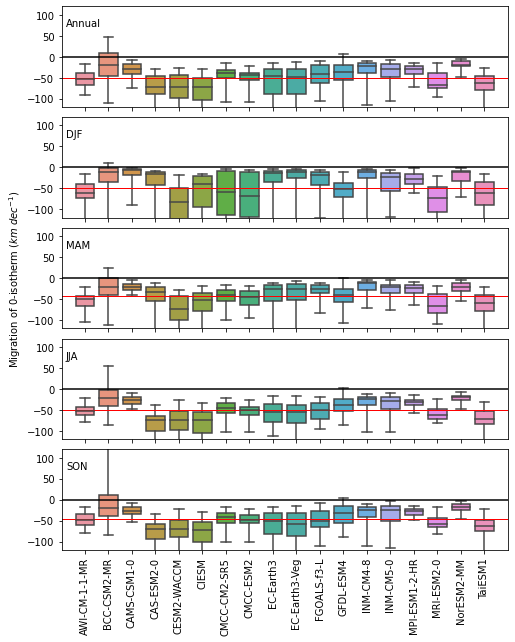

In [5]:
#####################################
# PLOT MODEL TRENDS HISTORICAL ALL LONGITUDES

#Figure and axis
from matplotlib import gridspec

fig = plt.figure(figsize=(8,10), facecolor='white')
spec = gridspec.GridSpec(ncols=1, nrows=5)

ax1 = fig.add_subplot(spec[0])
ax2 = fig.add_subplot(spec[1])
ax3 = fig.add_subplot(spec[2])
ax4 = fig.add_subplot(spec[3])
ax5 = fig.add_subplot(spec[4])

#fig, (ax1, ax2, ax3, ax4, ax5)  = plt.subplots(5, 2, sharex=True, sharey=True, gridspec_kw={'hspace': 0.1}, figsize=(8,10), facecolor='white')
models = ['AWI-CM-1-1-MR', 'BCC-CSM2-MR', 'CAMS-CSM1-0', 'CAS-ESM2-0', 'CESM2-WACCM', 'CIESM', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'EC-Earth3', 'EC-Earth3-Veg', 'FGOALS-f3-L', 'GFDL-ESM4', 'INM-CM4-8', 'INM-CM5-0', 'MPI-ESM1-2-HR', 'MRI-ESM2-0', 'NorESM2-MM', 'TaiESM1']

sns.boxplot(data=np.transpose(slope_ANN[:,:]*10*111), whis=[1,99], showfliers=False, ax=ax1)
sns.boxplot(data=np.transpose(slope_DJF[:,:]*10*111), whis=[1,99], showfliers=False, ax=ax2)
sns.boxplot(data=np.transpose(slope_MAM[:,:]*10*111), whis=[1,99], showfliers=False, ax=ax3)
sns.boxplot(data=np.transpose(slope_JJA[:,:]*10*111), whis=[1,99], showfliers=False, ax=ax4)
sns.boxplot(data=np.transpose(slope_SON[:,:]*10*111), whis=[1,99], showfliers=False, ax=ax5)

print('ANN: ' + str(np.mean(slope_ANN[:,:]*10*111)) + ' km/decade +- ' + str(np.std(np.mean(slope_ANN[:,:], axis=1)*10*111)))
print('DJF: ' + str(np.mean(slope_DJF[:,:]*10*111)) + ' km/decade +- ' + str(np.std(np.mean(slope_DJF[:,:], axis=1)*10*111)))
print('MAM: ' + str(np.mean(slope_MAM[:,:]*10*111)) + ' km/decade +- ' + str(np.std(np.mean(slope_MAM[:,:], axis=1)*10*111)))
print('JJA: ' + str(np.mean(slope_JJA[:,:]*10*111)) + ' km/decade +- ' + str(np.std(np.mean(slope_JJA[:,:], axis=1)*10*111)))
print('SON: ' + str(np.mean(slope_SON[:,:]*10*111)) + ' km/decade +- ' + str(np.std(np.mean(slope_SON[:,:], axis=1)*10*111)))

#Plot mean value
ax1.plot([-1,n_models],[np.mean(slope_ANN[:,:])*10*111,np.mean(slope_ANN[:,:])*10*111], '-r', linewidth=1)
ax2.plot([-1,n_models],[np.mean(slope_DJF[:,:])*10*111,np.mean(slope_DJF[:,:])*10*111], '-r', linewidth=1)
ax3.plot([-1,n_models],[np.mean(slope_MAM[:,:])*10*111,np.mean(slope_MAM[:,:])*10*111], '-r', linewidth=1)
ax4.plot([-1,n_models],[np.mean(slope_JJA[:,:])*10*111,np.mean(slope_JJA[:,:])*10*111], '-r', linewidth=1)
ax5.plot([-1,n_models],[np.mean(slope_SON[:,:])*10*111,np.mean(slope_SON[:,:])*10*111], '-r', linewidth=1)

#Plot 0 reference
ax1.plot([-1,n_models],[0,0], '-k')
ax2.plot([-1,n_models],[0,0], '-k')
ax3.plot([-1,n_models],[0,0], '-k')
ax4.plot([-1,n_models],[0,0], '-k')
ax5.plot([-1,n_models],[0,0], '-k')

#Season
ax1.annotate('Annual', xy=(.01, .80), xycoords='axes fraction', zorder=2)
ax2.annotate('DJF', xy=(.01, .80), xycoords='axes fraction', zorder=2)
ax3.annotate('MAM', xy=(.01, .80), xycoords='axes fraction', zorder=2)
ax4.annotate('JJA', xy=(.01, .80), xycoords='axes fraction', zorder=2)
ax5.annotate('SON', xy=(.01, .80), xycoords='axes fraction', zorder=2)

ax1.set_xlim([-1,n_models])
ax2.set_xlim([-1,n_models])
ax3.set_xlim([-1,n_models])
ax4.set_xlim([-1,n_models])
ax5.set_xlim([-1,n_models])

ax1.set_ylim([-120,120])
ax2.set_ylim([-120,120])
ax3.set_ylim([-120,120])
ax4.set_ylim([-120,120])
ax5.set_ylim([-120,120])

ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax3.set_xticklabels([])
ax4.set_xticklabels([])
ax5.set_xticklabels(models, rotation=90)

#ax1.set_yticklabels([])
#ax2.set_yticklabels([])
#ax3.set_yticklabels([])
#ax4.set_yticklabels([])
#ax5.set_yticklabels([])

ax3.set_ylabel('Migration of 0-isotherm ($km \\ dec^{-1}$)')
fig.subplots_adjust(wspace=0, hspace=0.1)

ANN: -55.65315182450698 deg/decade +- 25.793351411805215
DJF: -49.790398191360545 deg/decade +- 35.18592840909928
MAM: -40.90978519739903 deg/decade +- 26.186098340163
JJA: -55.05429322484488 deg/decade +- 24.747309122529664
SON: -52.6368538536293 deg/decade +- 24.316641508489628


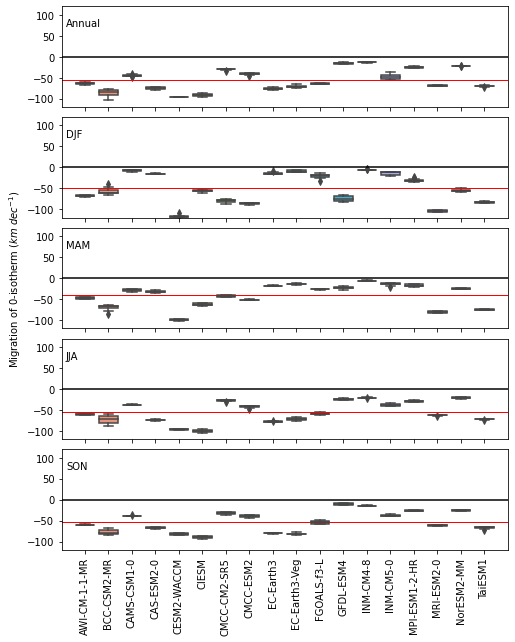

In [6]:
#####################################
# PLOT MODEL TRENDS HISTORICAL ANTARCTIC PENINSULA
AP_ix_W = np.where(lons >= -70+360)[0][0]
AP_ix_E = np.where(lons <= -55+360)[0][-1]

#Figure and axis
from matplotlib import gridspec

fig = plt.figure(figsize=(8,10), facecolor='white')
spec = gridspec.GridSpec(ncols=1, nrows=5)

ax1 = fig.add_subplot(spec[0])
ax2 = fig.add_subplot(spec[1])
ax3 = fig.add_subplot(spec[2])
ax4 = fig.add_subplot(spec[3])
ax5 = fig.add_subplot(spec[4])

#fig, (ax1, ax2, ax3, ax4, ax5)  = plt.subplots(5, 2, sharex=True, sharey=True, gridspec_kw={'hspace': 0.1}, figsize=(8,10), facecolor='white')
models = ['AWI-CM-1-1-MR', 'BCC-CSM2-MR', 'CAMS-CSM1-0', 'CAS-ESM2-0', 'CESM2-WACCM', 'CIESM', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'EC-Earth3', 'EC-Earth3-Veg', 'FGOALS-f3-L', 'GFDL-ESM4', 'INM-CM4-8', 'INM-CM5-0', 'MPI-ESM1-2-HR', 'MRI-ESM2-0', 'NorESM2-MM', 'TaiESM1']

sns.boxplot(data=np.transpose(slope_ANN[:,AP_ix_W:AP_ix_E]*10*111), ax=ax1)
sns.boxplot(data=np.transpose(slope_DJF[:,AP_ix_W:AP_ix_E]*10*111), ax=ax2)
sns.boxplot(data=np.transpose(slope_MAM[:,AP_ix_W:AP_ix_E]*10*111), ax=ax3)
sns.boxplot(data=np.transpose(slope_JJA[:,AP_ix_W:AP_ix_E]*10*111), ax=ax4)
sns.boxplot(data=np.transpose(slope_SON[:,AP_ix_W:AP_ix_E]*10*111), ax=ax5)

print('ANN: ' + str(np.mean(slope_ANN[:,AP_ix_W:AP_ix_E]*10*111)) + ' deg/decade +- ' + str(np.std(np.mean(slope_ANN[:,AP_ix_W:AP_ix_E], axis=1)*10*111)))
print('DJF: ' + str(np.mean(slope_DJF[:,AP_ix_W:AP_ix_E]*10*111)) + ' deg/decade +- ' + str(np.std(np.mean(slope_DJF[:,AP_ix_W:AP_ix_E], axis=1)*10*111)))
print('MAM: ' + str(np.mean(slope_MAM[:,AP_ix_W:AP_ix_E]*10*111)) + ' deg/decade +- ' + str(np.std(np.mean(slope_MAM[:,AP_ix_W:AP_ix_E], axis=1)*10*111)))
print('JJA: ' + str(np.mean(slope_JJA[:,AP_ix_W:AP_ix_E]*10*111)) + ' deg/decade +- ' + str(np.std(np.mean(slope_JJA[:,AP_ix_W:AP_ix_E], axis=1)*10*111)))
print('SON: ' + str(np.mean(slope_SON[:,AP_ix_W:AP_ix_E]*10*111)) + ' deg/decade +- ' + str(np.std(np.mean(slope_SON[:,AP_ix_W:AP_ix_E], axis=1)*10*111)))

#Plot mean value
ax1.plot([-1,n_models],[np.mean(slope_ANN[:,AP_ix_W:AP_ix_E])*10*111,np.mean(slope_ANN[:,AP_ix_W:AP_ix_E])*10*111], '-r', linewidth=1)
ax2.plot([-1,n_models],[np.mean(slope_DJF[:,AP_ix_W:AP_ix_E])*10*111,np.mean(slope_DJF[:,AP_ix_W:AP_ix_E])*10*111], '-r', linewidth=1)
ax3.plot([-1,n_models],[np.mean(slope_MAM[:,AP_ix_W:AP_ix_E])*10*111,np.mean(slope_MAM[:,AP_ix_W:AP_ix_E])*10*111], '-r', linewidth=1)
ax4.plot([-1,n_models],[np.mean(slope_JJA[:,AP_ix_W:AP_ix_E])*10*111,np.mean(slope_JJA[:,AP_ix_W:AP_ix_E])*10*111], '-r', linewidth=1)
ax5.plot([-1,n_models],[np.mean(slope_SON[:,AP_ix_W:AP_ix_E])*10*111,np.mean(slope_SON[:,AP_ix_W:AP_ix_E])*10*111], '-r', linewidth=1)


#Plot 0 reference
ax1.plot([-1,n_models],[0,0], '-k')
ax2.plot([-1,n_models],[0,0], '-k')
ax3.plot([-1,n_models],[0,0], '-k')
ax4.plot([-1,n_models],[0,0], '-k')
ax5.plot([-1,n_models],[0,0], '-k')

#Season
ax1.annotate('Annual', xy=(.01, .80), xycoords='axes fraction', zorder=2)
ax2.annotate('DJF', xy=(.01, .80), xycoords='axes fraction', zorder=2)
ax3.annotate('MAM', xy=(.01, .80), xycoords='axes fraction', zorder=2)
ax4.annotate('JJA', xy=(.01, .80), xycoords='axes fraction', zorder=2)
ax5.annotate('SON', xy=(.01, .80), xycoords='axes fraction', zorder=2)

ax1.set_xlim([-1,n_models])
ax2.set_xlim([-1,n_models])
ax3.set_xlim([-1,n_models])
ax4.set_xlim([-1,n_models])
ax5.set_xlim([-1,n_models])

ax10.set_xlim([-1,1])
ax1.set_ylim([-120,120])
ax2.set_ylim([-120,120])
ax3.set_ylim([-120,120])
ax4.set_ylim([-120,120])
ax5.set_ylim([-120,120])

ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax3.set_xticklabels([])
ax4.set_xticklabels([])
ax5.set_xticklabels(models, rotation=90)

#ax1.set_yticklabels([])
#ax2.set_yticklabels([])
#ax3.set_yticklabels([])
#ax4.set_yticklabels([])
#ax5.set_yticklabels([])

ax3.set_ylabel('Migration of 0-isotherm ($km \\ dec^{-1}$)')
fig.subplots_adjust(wspace=0, hspace=0.1)

In [7]:
print(str(np.min(np.mean(slope_ANN[:,:], axis=1)*10*111)))
print(str(np.max(np.mean(slope_ANN[:,:], axis=1)*10*111)))
print(str(np.max(np.mean(slope_ANN[:,AP_ix_W:AP_ix_E], axis=1)*10*111)))
print(str(np.min(np.mean(slope_ANN[:,AP_ix_W:AP_ix_E], axis=1)*10*111)))

-82.99854321143746
-18.5400573640582
-13.084212755580253
-95.87942672121783
